In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_fairness(file_path, CTT_values):
    # Carica i dati da un file CSV
    df = pd.read_csv(file_path)

    totFair = 0
    totFair1 = 0
    fairness_values = []

    # Applica il filtro 'responseMessage' == 'OK'
    df = df[df['responseMessage'] == 'OK']

    for thread_number in range(1, len(CTT_values) + 1):  # Loop from 1 to len(CTT_values)
        thread_group_name = f'Thread Group {thread_number}-'
        mask = df.threadName.str.contains(thread_group_name)
        df_thread_group = df[mask]

        # Calcolo duration
        TimeStapMax = df_thread_group['timeStamp'].max()
        TimeStapMin = df_thread_group['timeStamp'].min()
        Duration = (TimeStapMax - TimeStapMin) / 1000
        Tot_Req_ok = df_thread_group['threadName'].count()
        Throughput = (Tot_Req_ok / Duration) * 60

        # Get the corresponding CTT value for the current thread group
        CTT = CTT_values[thread_number - 1]

        Fair = Throughput / CTT
        totFair = ((Fair) * (Fair)) + totFair
        totFair1 = Fair + totFair1

        # Append fairness value to the list for visualization
        fairness_values.append(Fair)

    # Calculate the final fairness metric
    FairFin = (totFair1 * (totFair1)) / (len(CTT_values) * (totFair))

    # Visualize the fairness values
    plt.bar(range(1, len(CTT_values) + 1), fairness_values, tick_label=[f'Group{i}' for i in range(1, len(CTT_values) + 1)])

    plt.ylabel('Normalaized Throughput')
    plt.title('Fairness Metric for Each Thread Group')
    plt.show()
    return FairFin, fairness_values


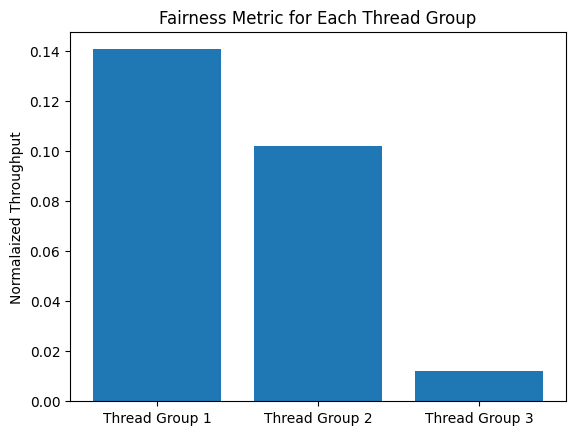

Fairness Metric: 0.7140919846680523


In [ ]:
# Programma principale
if __name__ == "__main__":
  #1)Gruppi omogenei Small,Medium,Large
  file_path = '/content/Cattura1.csv'
  CTT_values = [1400, 1400, 1400]
  # Call the function and get the result and fairness values
  result, fairness_values = calculate_fairness(file_path, CTT_values)
  print("Fairness Metric:", result)

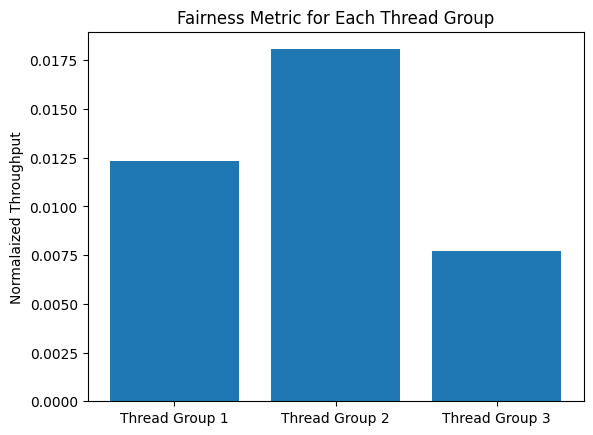

Fairness Metric: 0.9003126020207247


In [ ]:
# Specify the file path
#2)Gruppi eterogenei in ogni thread Group Small,Medium,Large
file_path = '/content/Cattura2.csv'
CTT_values = [2100, 1400, 700]
# Call the function and get the result and fairness values
result, fairness_values = calculate_fairness(file_path, CTT_values)
print("Fairness Metric:", result)





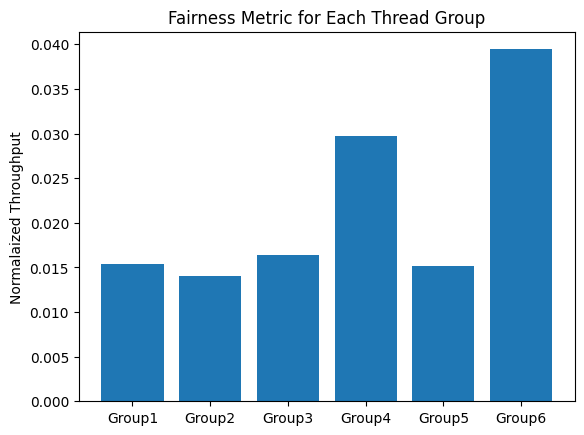

Fairness Metric: 0.8378400757444079


In [27]:
file_path = '/content/Cattura4.csv'
#3)Gruppi eterogenei in ogni thread Group Small,Medium,Large
CTT_values = [1200, 900, 700, 500,450, 350]
# Call the function and get the result and fairness values
result, fairness_values = calculate_fairness(file_path, CTT_values)
print("Fairness Metric:", result)